In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats import linregress
%matplotlib inline

In [15]:
df =  pd.read_csv("epa-sea-level.csv")

In [16]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


### Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

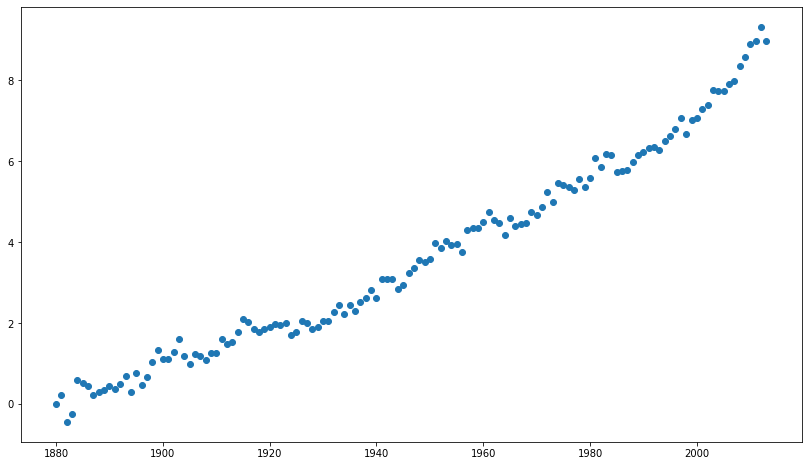

In [24]:
plt.subplots(figsize=(14,8))
plt.scatter(x=df.Year, y= df["CSIRO Adjusted Sea Level"])

### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [25]:
slope, intercept, r_value, p_value, std_err = linregress(df.Year, df["CSIRO Adjusted Sea Level"])

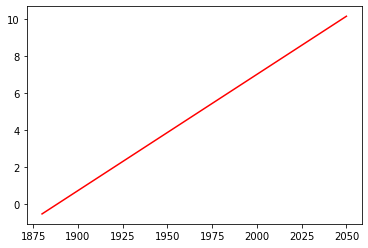

In [61]:
x=range(1880,2051)
y=slope*x+intercept
plt.plot(x,y,"-r")

In [60]:
list(x)

[1880,
 1885,
 1890,
 1895,
 1900,
 1905,
 1910,
 1915,
 1920,
 1925,
 1930,
 1935,
 1940,
 1945,
 1950,
 1955,
 1960,
 1965,
 1970,
 1975,
 1980,
 1985,
 1990,
 1995,
 2000,
 2005,
 2010,
 2015,
 2020,
 2025,
 2030,
 2035,
 2040,
 2045,
 2050]

### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [32]:
df["CSIRO Adjusted Sea Level"].loc[df.Year >= 2000]

120    7.062992
121    7.287402
122    7.381890
123    7.759843
124    7.740157
125    7.744094
126    7.917323
127    7.996063
128    8.350394
129    8.586614
130    8.901575
131    8.964567
132    9.326772
133    8.980315
Name: CSIRO Adjusted Sea Level, dtype: float64

In [35]:
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df.Year.loc[df.Year >=2000],df["CSIRO Adjusted Sea Level"].loc[df.Year >= 2000])

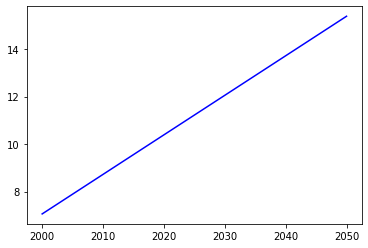

In [70]:
#x2 = np.linspace(2000, 2050,5)
#x2 = df.Year.loc[df.Year >=2000]
x2 = range(2000,2051)
y2 = slope2 * x2 + intercept2
plt.plot(x2, y2, "-b")

### The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

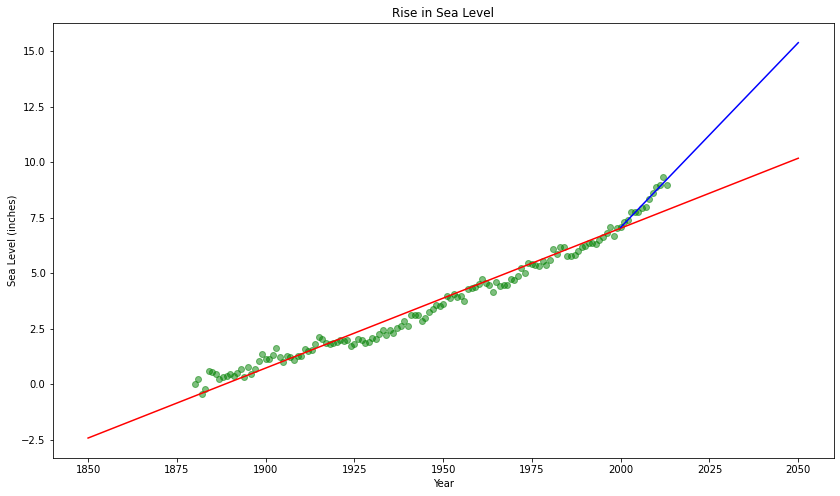

In [68]:
plt.subplots(figsize=(14,8))
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.scatter(x=df.Year, y= df["CSIRO Adjusted Sea Level"], c="g", alpha=0.5)
plt.xticks(range(1850, 2100, 25))
slope, intercept, r_value, p_value, std_err = linregress(df.Year, df["CSIRO Adjusted Sea Level"])
x=np.linspace(1850,2050,10)
y=slope*x+intercept
plt.plot(x,y,"-r")
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df.Year.loc[df.Year >=2000],df["CSIRO Adjusted Sea Level"].loc[df.Year >= 2000])
x2 = np.linspace(2000, 2050,5)
y2 = slope2 * x2 + intercept2
plt.plot(x2, y2, "-b")
plt.savefig("sea_level_plot.png")
plt.show()